In [ ]:
import torch
torch.__version__

'1.9.0+cu102'

## MMDetection 다운로드

In [ ]:
# mmcv를 위해서 mmcv-full를 설치해야 함 
!pip install mmcv-full

     |████████████████████████████████| 313 kB 7.3 MB/s 
     |████████████████████████████████| 185 kB 56.5 MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.3.13-cp37-cp37m-linux_x86_64.whl size=29440342 sha256=545ff5d7fa874705081f1aa159d6183a2671e708cef606ec2fc80b2d4e524fff
  Stored in directory: /root/.cache/pip/wheels/9d/13/23/7c772e752c5e05ef7fc7328dccefc152df8ab7bbf66b2ee59c
Successfully built mmcv-full


In [ ]:
!git clone https://github.com/open-mmlab/mmdetection.git
!cd mmdetection; python setup.py install

Cloning into 'mmdetection'...
remote: Enumerating objects: 20799, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 20799 (delta 0), reused 1 (delta 0), pack-reused 20798
Receiving objects: 100% (20799/20799), 24.59 MiB | 26.29 MiB/s, done.
Resolving deltas: 100% (14568/14568), done.
running install
running bdist_egg
running egg_info
creating mmdet.egg-info
writing mmdet.egg-info/PKG-INFO
writing dependency_links to mmdet.egg-info/dependency_links.txt
writing requirements to mmdet.egg-info/requires.txt
writing top-level names to mmdet.egg-info/top_level.txt
writing manifest file 'mmdet.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE'
writing manifest file 'mmdet.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/mmdet
copying mmdet/version.py -> build/lib/mmdet
copying mmdet/__init__.py -> build/lib/mmdet
creating 

## MMDetection_Faster_RCNN_Inference


In [ ]:
from mmdet.apis import init_detector, inference_detector
import mmcv

In [ ]:
# pretrained weight 모델을 다운로드 받기위해 mmdetection/checkpoints 디렉토리를 만듬
!cd mmdetection; mkdir checkpoints

In [ ]:
# pretrained 모델 다운로드
!wget -O /content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

--2021-09-14 04:50:48--  https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.254.186.225
Connecting to download.openmmlab.com (download.openmmlab.com)|47.254.186.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167287506 (160M) [application/octet-stream]
Saving to: ‘/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’

/content/mmdetectio 100%[===================>] 159.54M  1.12MB/s    in 87s     

2021-09-14 04:52:16 (1.83 MB/s) - ‘/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’ saved [167287506/167287506]



In [ ]:
# 다운로드된 모델 확인
!ls -lia /content/mmdetection/checkpoints

total 163380
4590739 drwxr-xr-x  2 root root      4096 Sep 14 04:50 .
4587522 drwxr-xr-x 19 root root      4096 Sep 14 04:48 ..
4590740 -rw-r--r--  1 root root 167287506 Aug 28  2020 faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


In [ ]:
# config 파일 설정(상대경로)
config_file = 'configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
# pretrained 모델을 checkpoint로 설정(상대경로)
checkpoint_file = 'checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

In [ ]:
# mmdetection은 상대 경로를 인자로 주면 무조건 mmdetection 디렉토리를 기준으로 함
%cd mmdetection

/content/mmdetection


In [ ]:
# pretrained 모델 불러오기
model = init_detector(config_file, checkpoint_file, device='cuda:0')

/usr/local/lib/python3.7/dist-packages/mmdet-2.16.0-py3.7.egg/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '


Use load_from_local loader


In [ ]:
# content로 디렉토리 변경
%cd /content

/content


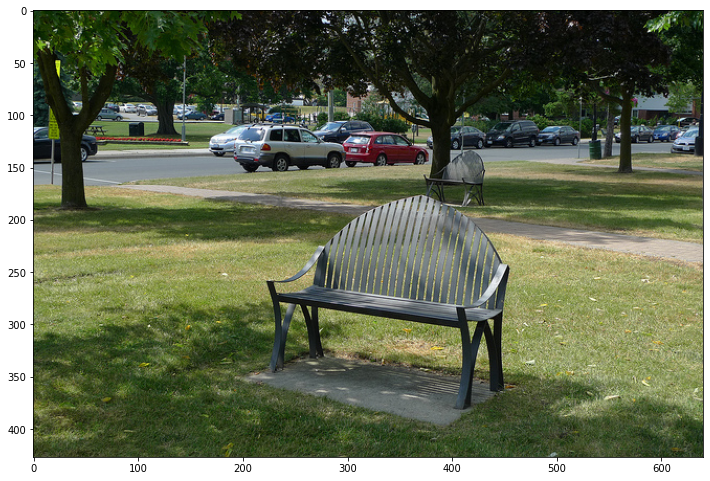

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = '/content/mmdetection/demo/demo.jpg'

img_arr = cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(img_arr)

plt.show()

In [ ]:
#inference_detector의 인자로 string(file경로) or ndarray가 단일 또는 list형태로 입력될 수 있음
results = inference_detector(model, img)

/usr/local/lib/python3.7/dist-packages/mmdet-2.16.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet-2.16.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


In [ ]:
type(results), len(results)

(list, 80)

In [ ]:
# results는 list형으로 coco class의  0부터 79까지 class_id별로 80개의 array를 가짐. 
# 개별 array들은 각 클래스별로 5개의 값(좌표값과 class별로 confidence)을 가짐([xmin, ymin, xmax, ymax, class_confidence score]). 개별 class별로 여러개의 좌표를 가지면 여러개의 array가 생성됨. 
# 좌표는 좌상단(xmin, ymin), 우하단(xmax, ymax) 기준. 
# 개별 array의 shape는 (Detection된 object들의 수, 5(좌표와 confidence)) 임 
results

[array([[3.75348572e+02, 1.19171005e+02, 3.81950867e+02, 1.34460617e+02,
         1.35454863e-01],
        [5.32362000e+02, 1.09554726e+02, 5.40526550e+02, 1.25222633e+02,
         8.88786465e-02],
        [3.61124298e+02, 1.09049202e+02, 3.68625610e+02, 1.22483063e+02,
         7.20717609e-02]], dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([[6.09650024e+02, 1.13805901e+02, 6.34511658e+02, 1.36951904e+02,
         9.88766015e-01],
        [4.81773712e+02, 1.10480995e+02, 5.22459717e+02, 1.30407104e+02,
         9.87157285e-01],
        [1.01821303e+00, 1.12144722e+02, 6.04374390e+01, 1.44173752e+02,
         9.83206093e-01],
        [2.94623749e+02, 1.17035233e+02, 3.78022675e+02, 1.50550873e+02,
         9.71326888e-01],
        [3.96328979e+02, 1.11203323e+02, 4.32490540e+02, 1.32729263e+02,
         9.67802048e-01],
        [5.90976318e+02, 1.10802658e+02, 6.15401917e+02, 1.26493553e+02,
         9.59414959e-01],
        [2.67582001e+02, 1.05686005e+02, 3.28818756

In [ ]:
results[2].shape

(46, 5)

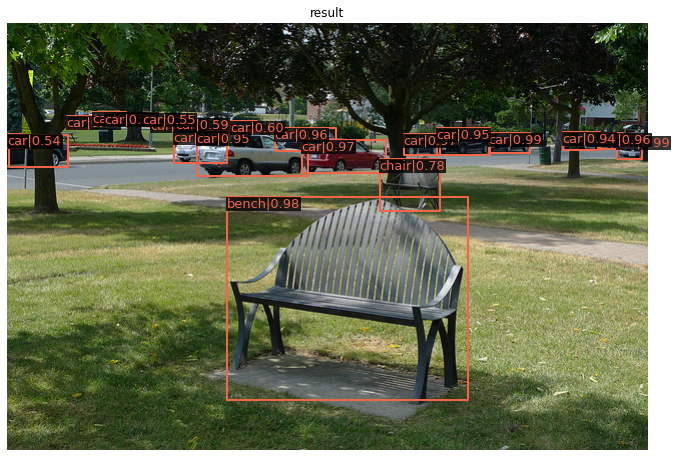

In [ ]:
from mmdet.apis import show_result_pyplot
# inference 된 결과를 원본 이미지에 적용하여 새로운 image로 생성(bbox 처리된 image)
# Default로 score threshold가 0.3 이상인 Object들만 시각화 적용. show_result_pyplot은 model.show_result()를 호출. 
show_result_pyplot(model, img, results, score_thr=0.5)

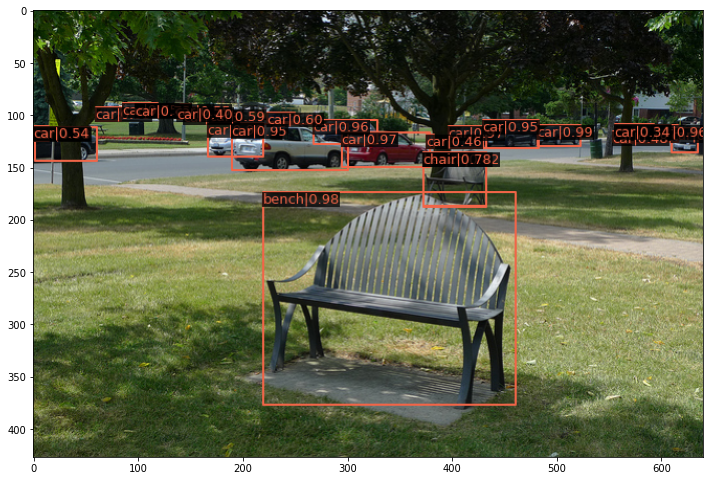

In [ ]:
detected_image = model.show_result(img, results)
detected_image = cv2.cvtColor(detected_image, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(detected_image)

plt.show()

## 모델의 Config 설정 확인

In [ ]:
model.__dict__

{'CLASSES': ('person',
  'bicycle',
  'car',
  'motorcycle',
  'airplane',
  'bus',
  'train',
  'truck',
  'boat',
  'traffic_light',
  'fire_hydrant',
  'stop_sign',
  'parking_meter',
  'bench',
  'bird',
  'cat',
  'dog',
  'horse',
  'sheep',
  'cow',
  'elephant',
  'bear',
  'zebra',
  'giraffe',
  'backpack',
  'umbrella',
  'handbag',
  'tie',
  'suitcase',
  'frisbee',
  'skis',
  'snowboard',
  'sports_ball',
  'kite',
  'baseball_bat',
  'baseball_glove',
  'skateboard',
  'surfboard',
  'tennis_racket',
  'bottle',
  'wine_glass',
  'cup',
  'fork',
  'knife',
  'spoon',
  'bowl',
  'banana',
  'apple',
  'sandwich',
  'orange',
  'broccoli',
  'carrot',
  'hot_dog',
  'pizza',
  'donut',
  'cake',
  'chair',
  'couch',
  'potted_plant',
  'bed',
  'dining_table',
  'toilet',
  'tv',
  'laptop',
  'mouse',
  'remote',
  'keyboard',
  'cell_phone',
  'microwave',
  'oven',
  'toaster',
  'sink',
  'refrigerator',
  'book',
  'clock',
  'vase',
  'scissors',
  'teddy_bear',


In [ ]:
#print(model.cfg)
print(model.cfg.pretty_text)

model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.

## array를 inference_detector()에 입력할 경우에는 원본 array를 BGR 형태로 입력 필요(RGB변환은 내부에서 수행)

/usr/local/lib/python3.7/dist-packages/mmdet-2.16.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet-2.16.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


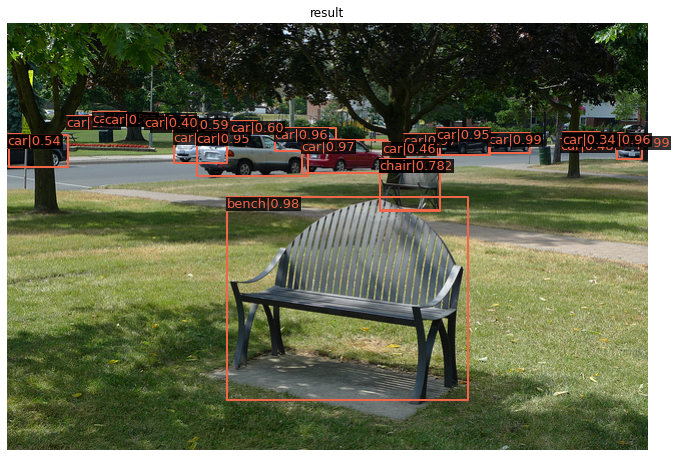

In [ ]:
import cv2

img_arr = cv2.imread('/content/mmdetection/demo/demo.jpg')
results = inference_detector(model, img_arr)

show_result_pyplot(model, img_arr, results)


## show_result_pyplot()을 이용하지 않고, inference 결과를 image로 표현하기
- model과 image array를 입력하면 해당 image를 detect하고 bbox 처리해주는 get_detected_img() 함수 생성.
- COCO 클래스 매핑은 0 부터 순차적으로 적용됨.
- results에 들어있는 array 값이 없는 경우는 해당 list의 index에 해당하는 class id값으로 object가 Detection되지 않은 것임.
- 개별 class의 score threshold가 낮은 값은 제외.

In [ ]:
# 0부터 순차적으로 클래스 매핑된 label 적용. 
labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                        11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                        21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                        31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                        41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                        51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                        61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                        71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush' }

In [ ]:
# model과 원본 이미지 array, filtering할 기준 class confidence score를 인자로 가지는 inference 시각화용 함수
def get_detected_img(model, img_array, score_threshold=0.3, is_print=True):
    draw_img = img_array.copy()
    bbox_color = (0, 255, 0)
    text_color = (0, 0, 255)

    # model과 image array를 입력 인자로 inference detection 수행하고 결과를 results로 받음. 
    # results는 80개의 2차원 array(shape=(오브젝트갯수, 5))를 가지는 list.
    results = inference_detector(model, img_array) 

    # 80개의 array원소를 가지는 results 리스트를 loop를 돌면서 개별 2차원 array들을 추출하고 이를 기반으로 이미지 시각화 
    # results 리스트의 위치 index가 바로 COCO 매핑된 Class id. 여기서는 result_ind가 class id
    # 개별 2차원 array에 오브젝트별 좌표와 class confidence score 값을 가짐.
    for result_idx, result in enumerate(results):
        # 개별 2차원 array의 row size가 0 이면 해당 Class id로 값이 없으므로 다음 loop로 진행
        if len(result) == 0:
            continue

        # 2차원 array에서 5번째 컬럼에 해당하는 값이 score threshold이며 이 값이 함수 인자로 들어온 score_threshold 보다 낮은 경우는 제외.
        result_filtered = result[np.where(result[:, 4] > score_threshold)]

        # 해당 클래스 별로 Detect된 여러개의 오브젝트 정보가 2차원 array에 담겨 있으며, 이 2차원 array를 row수만큼 iteration해서 개별 오브젝트의 좌표값 추출. 
        for filtered in result_filtered:
            # 좌상단, 우하단 좌표 추출.
            left = int(filtered[0])
            top = int(filtered[1])
            right = int(filtered[2])
            bottom = int(filtered[3])
            caption = f"{labels_to_names_seq[result_idx]}: {filtered[4]:.4f}"
            cv2.rectangle(draw_img, (left, top), (right, bottom), color=bbox_color, thickness=2)
            cv2.putText(draw_img, caption, (left, top-5), cv2.FONT_HERSHEY_SIMPLEX, 0.37, color=text_color, thickness=1)
            if is_print:
                print(caption)
    return draw_img

car: 0.9888
car: 0.9872
car: 0.9832
car: 0.9713
car: 0.9678
car: 0.9594
car: 0.9593
car: 0.9568
car: 0.9510
car: 0.9458
car: 0.9440
car: 0.9331
car: 0.8663
car: 0.8268
car: 0.7535
car: 0.7166
car: 0.6008
car: 0.5920
car: 0.5540
car: 0.5435
bench: 0.9778
chair: 0.7779


/usr/local/lib/python3.7/dist-packages/mmdet-2.16.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet-2.16.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


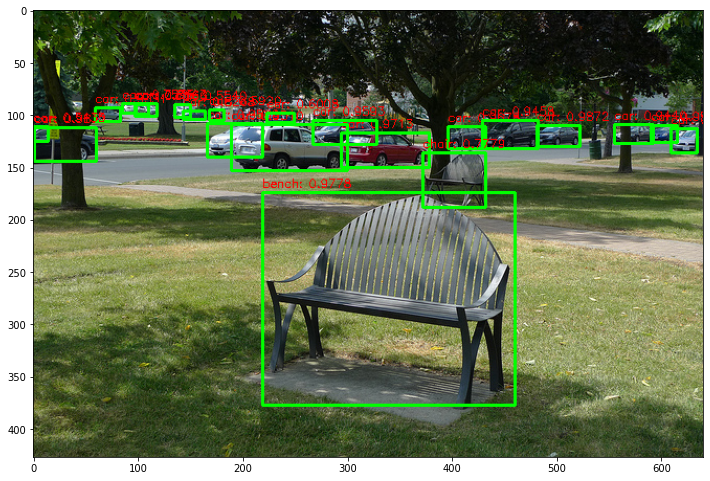

In [ ]:
img_arr = cv2.imread('/content/mmdetection/demo/demo.jpg')
detected_image = get_detected_img(model, img_arr, score_threshold=0.5, is_print=True)
# detect 입력된 이미지는 bgr임. 이를 최종 출력시 rgb로 변환
detected_image = cv2.cvtColor(detected_image, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(detected_image)

In [ ]:
# 비틀즈 데이터 다운로드
!mkdir data
!wget -O /content/data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
!ls -lia /content/data/beatles01.jpg

mkdir: cannot create directory ‘data’: File exists
--2021-09-14 07:44:53--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘/content/data/beatles01.jpg’

/content/data/beatl 100%[===================>] 374.14K  --.-KB/s    in 0.02s   

2021-09-14 07:44:53 (14.6 MB/s) - ‘/content/data/beatles01.jpg’ saved [383118/383118]

4590749 -rw-r--r-- 1 root root 383118 Sep 14 07:44 /content/data/beatles01.jpg


person: 0.9988
person: 0.9982
person: 0.9980
person: 0.9971
person: 0.9604
car: 0.9693
car: 0.9686
car: 0.9648
car: 0.9517
car: 0.9254
car: 0.9030
car: 0.8312
car: 0.8008
car: 0.7331
car: 0.6208
car: 0.4415
car: 0.4320
car: 0.4120
truck: 0.3142
tie: 0.5924
tie: 0.4043
skateboard: 0.4686
skateboard: 0.3808


/usr/local/lib/python3.7/dist-packages/mmdet-2.16.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet-2.16.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


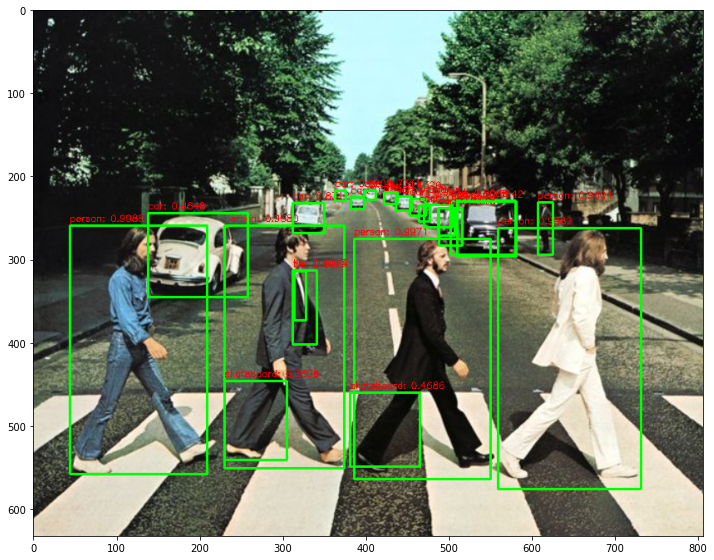

In [ ]:
beatles_bgr = cv2.imread('/content/data/beatles01.jpg')

detected_beatles = get_detected_img(model, beatles_bgr, score_threshold=0.3, is_print=True)
detected_beatles = cv2.cvtColor(detected_beatles, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(detected_beatles)

## Video Infenence